#**Introduction**
**Problem**\
Horse colic is a medical issue of abdominal pain, encompassing all forms of gastrointestinal conditions as well as other causes. Equine colic is the leading cause of premature death in horses, so properly identifying the causes and risk factors is very important.


**Dataset and Goals**\
*Dataset is linked [here](https://www.kaggle.com/datasets/uciml/horse-colic/).* In our analysis of the horse colic dataset, we focused on predicting the outcomes for different horses—whether they would live, die, or be euthanized. These predictions could be used in deciding whether or not a horse's current conditions are fatal or not and which features are strong indicators of such results. There are 299 datapoints and a mix of numerical and categorical features like capillary refill time, level of pain,  respiratory rate, mucous membrane color, etc. A large proportion of this dataset has missing values, which was a significant issue we tried to solve through data exploration and various imputation techniques.

Throughout the project, we performed data cleaning and exploration and then explored multiple modeling techniques, experiencing varying levels of success. This process reflected the complexity often encountered in real-world datasets and underscores the importance of doing robust data cleaning and trying different modeling strategies.


**Group**: Nicole Cao, Gina Jeon, Namila Rahmani, Austin Teng



### Data set sourced from https://www.kaggle.com/datasets/uciml/horse-colic?select=horse.csv
Contains data about medical records for horses, including their current condition and the outcome after their examination: whether lived, died, or were euthanized.

Our goal is to generate a model that can assist veterinarians by predicting the outcome of horses. Our models offer a second opinion relying on the previous cases seen in our dataset.

The dataset contains 300 records of 28 features (continuous, discrete, and nominal) missing around 30% of values.

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from google.colab import files
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# reading in the dataset
df = pd.read_csv("horse.csv")
#df = pd.read_csv("train.csv")
cols = df.columns.tolist()
cols.remove('outcome')
cols.append('outcome')
df = df[cols]
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,no,11300,0,0,no,died
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,no,2208,0,0,no,euthanized
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,no,0,0,0,yes,lived
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes,died
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,no,4300,0,0,no,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,no,3205,0,0,no,euthanized
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,yes,2208,0,0,yes,euthanized
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,yes,3205,0,0,no,died
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,yes,2208,0,0,yes,lived


#**Data Cleaning and Exploration**
Initially, due to our already large amount of features relative to amount of records, we decided to simply drop features that contain too many missing values. We believe that the nasogastric tube related features are information not typically measured during each horse diagnostic. Abdominocentesis appearance and the protein quantity relies on extracting fluid via a needle which is not typical during each horse diagnostic.

Due to the amount of missing values we believed it was best to remove the features entirely instead of imputing data. It may also be reasonable to assume that those cases had normal values as a default, more domain knowledge on the symptoms may help with that assumption.

In [ ]:
# drop columns with too many NaNs
print(df.isna().sum())
df = df.dropna(thresh=len(df) - 100, axis=1)
df

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,absent,severe,45.0,8.4,no,11300,0,0,no,died
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,absent,slight,50.0,85.0,no,2208,0,0,no,euthanized
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,hypomotile,none,33.0,6.7,no,0,0,0,yes,lived
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,absent,severe,48.0,7.2,yes,2208,0,0,yes,died
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,74.0,7.4,no,4300,0,0,no,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,absent,NaN,55.0,65.0,no,3205,0,0,no,euthanized
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,hypomotile,moderate,44.0,NaN,yes,2208,0,0,yes,euthanized
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,absent,moderate,60.0,6.8,yes,3205,0,0,no,died
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,hypomotile,moderate,50.0,6.0,yes,2208,0,0,yes,lived


The data set contains features to allow cases with multiple lesions in different areas. Due to the extremely low number of records with multiple lesions (7), we decided to drop those records entirely.

In [ ]:
# Ignore records with multiple lesions, few instances
print("Size before drop:", len(df))
# to_drop = df[df["lesion_2"] != 0]

df_drop = df[df["lesion_2"] == 0]
df_drop = df_drop[df_drop["lesion_3"] == 0]
df_drop = df_drop.loc[:, df_drop.columns != "lesion_2"]
df_drop = df_drop.loc[:, df_drop.columns != "lesion_3"]

# ID
df_drop = df_drop.loc[:, df_drop.columns != "hospital_number"]
df_drop = df_drop.loc[:, df_drop.columns != "cp_data"]

print("Size after drop:", len(df_drop))
df = df_drop
df

Size before drop: 299
Size after drop: 292


,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,lesion_1,outcome
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,no,11300,died
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,no,2208,euthanized
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,no,0,lived
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,yes,2208,died
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,no,4300,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,55.0,65.0,no,3205,euthanized
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,NaN,yes,2208,euthanized
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,yes,3205,died
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,yes,2208,lived


In [ ]:
print(len(df))
print(df.isna().sum())
# df.dropna()

292
surgery                   0
age                       0
rectal_temp              59
pulse                    24
respiratory_rate         58
temp_of_extremities      55
peripheral_pulse         66
mucous_membrane          45
capillary_refill_time    31
pain                     54
peristalsis              44
abdominal_distention     55
packed_cell_volume       29
total_protein            33
surgical_lesion           0
lesion_1                  0
outcome                   0
dtype: int64


Information on lesions are stored as 4-5 digit numbers where each digit represents different information about the lesion. The following key is taken directly from the data's dictionary:

- first number is site of lesion
  - 1 = gastric
  - 2 = sm intestine
  - 3 = lg colon
  - 4 = lg colon and cecum
  - 5 = cecum
  - 6 = transverse colon
  - 7 = retum/descending colon
  - 8 = uterus
  - 9 = bladder
  - 11 = all intestinal sites
  - 00 = none
- second number is type of lesion
  - 1 = simple
  - 2 = strangulation
  - 3 = inflammation
  - 4 = other
- third number is subtype of lesion
  - 1 = mechanical
  - 2 = paralytic
  - 0 = n/a
- fourth number is specific code of lesion
  - 1 = obturation
  - 2 = intrinsic
  - 3 = extrinsic
  - 4 = adynamic
  - 5 = volvulus/torsion
  - 6 = intussuption
  - 7 = thromboembolic
  - 8 = hernia
  - 9 = lipoma/slenic incarceration
  - 10 = displacement
  - 0 = n/a

The following code separates that feature into 4 categorical features based on the above.

In [ ]:
def split_lesion(value: int):
  output = [0,0,0,0]
  if value >= 10000:
    if value >= 11000 and value < 12000:
      for i in range(0, 4):
        output[i] = value // pow(10, 3-i)
        value = value % pow(10, 3-i)
    else:
      for i in range(0, 4):
        output[i] = value // (pow(10, 3-i) * 10)
        value = value % (pow(10, 3-i) * 10)
      output[3] = output[3] * 10 + value

  else:
    for i in range(0, 4):
      output[i] = value // pow(10, 3-i)
      value = value % pow(10, 3-i)
  return output

In [ ]:
def map_lesion_info(df: pd.DataFrame):
  site_map = {1: 'gastric',
              2: 'sm intestine',
              3: 'lg colon',
              4: 'lg colon and cecum',
              5: 'cecum',
              6: 'transverse colon',
              7: 'retum/descending colon',
              8: 'uterus',
              9: 'bladder',
              11: 'all intestinal sites',
              0: None}
  type_map = {1: 'simple',
              2: 'strangulation',
              3: 'inflammation',
              4: 'other'}
  subtype_map = {1: 'mechanical',
                 2: 'paralytic',
                 0: None}
  code_map = {1: 'obturation',
                  2: 'intrinsic',
                  3: 'extrinsic',
                  4: 'adynamic',
                  5: 'volvulus/torsion',
                  6: 'intussuption',
                  7: 'thromboembolic',
                  8: 'hernia',
                  9: 'lipoma/slenic incarceration',
                  10: 'displacement',
                  0: None}
  df['site of lesion'] = df['site of lesion'].map(site_map)
  df['type of lesion'] = df['type of lesion'].map(type_map)
  df['subtype of lesion'] = df['subtype of lesion'].map(subtype_map)
  df['lesion specific code'] = df['lesion specific code'].map(code_map)
  return df

In [ ]:
output = df['lesion_1'].map(split_lesion)
output = list(output)
lesion_df = pd.DataFrame(output, columns = ['site of lesion', 'type of lesion', 'subtype of lesion', 'lesion specific code'], index=df.index)
lesion_df = map_lesion_info(lesion_df)
df = df.join(lesion_df)  #TODO comfirm change
df = df.loc[:, df.columns != 'lesion_1']
df

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,surgical_lesion,outcome,site of lesion,type of lesion,subtype of lesion,lesion specific code
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,no,died,all intestinal sites,inflammation,None,None
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,no,euthanized,sm intestine,strangulation,None,hernia
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,no,lived,None,NaN,None,None
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,yes,died,sm intestine,strangulation,None,hernia
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,no,died,lg colon and cecum,inflammation,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,55.0,65.0,no,euthanized,lg colon,strangulation,None,volvulus/torsion
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,NaN,yes,euthanized,sm intestine,strangulation,None,hernia
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,yes,died,lg colon,strangulation,None,volvulus/torsion
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,yes,lived,sm intestine,strangulation,None,hernia


To make the data easier to work with and compatible with our models, we one-hot encode the lesion categorical features.

In [ ]:
one_hot_df = pd.get_dummies(df, columns=['site of lesion', 'type of lesion', 'subtype of lesion', 'lesion specific code'])
cols = one_hot_df.columns.tolist()
cols.remove('outcome')
cols.append('outcome')
one_hot_df = one_hot_df[cols]
df = one_hot_df
df

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,lesion specific code_displacement,lesion specific code_extrinsic,lesion specific code_hernia,lesion specific code_intrinsic,lesion specific code_intussuption,lesion specific code_lipoma/slenic incarceration,lesion specific code_obturation,lesion specific code_thromboembolic,lesion specific code_volvulus/torsion,outcome
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,0,0,0,0,0,0,0,0,0,died
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,0,0,1,0,0,0,0,0,0,euthanized
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,0,0,0,0,0,0,0,0,0,lived
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,0,0,1,0,0,0,0,0,0,died
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,0,0,0,0,0,0,0,0,0,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,...,0,0,0,0,0,0,0,0,1,euthanized
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,...,0,0,1,0,0,0,0,0,0,euthanized
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,0,0,0,0,0,0,0,0,1,died
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,...,0,0,1,0,0,0,0,0,0,lived


The following is the amount of missing values for numerical data. We will impute these values using the mean value for that record.

Number of NaN values in numerical features:
rectal_temp           59
pulse                 24
respiratory_rate      58
packed_cell_volume    29
total_protein         33
dtype: int64


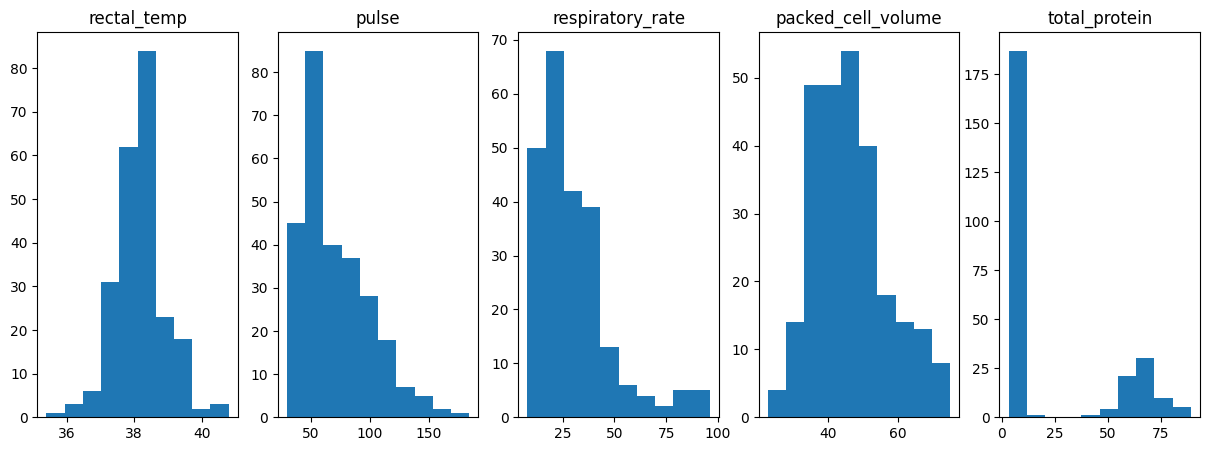

In [ ]:
num_df = df.loc[:,df.dtypes!=object]

# Name of each numerical column with nans
nan_cols = [i for i in num_df.columns if num_df[i].isnull().any()]
print("Number of NaN values in numerical features:")
print(df[nan_cols].isna().sum())

fig, ax = plt.subplots(1, len(nan_cols), figsize=(15,5))
for idx, col in enumerate(nan_cols):
  # df[~df[col].isna()][col].hist()
  # plt.title(col)
  # plt.show()
  ax[idx].hist(df[~df[col].isna()][col])
  ax[idx].title.set_text(col)
plt.show(fig)

Since rectal_temp and packed_cell_volume are nomally distributed, we will conduct imputation based on the data's mean.
Since pulse, respiratory_rate, and total_protein count are skewed, (total_protein heavily so), we will conduct imputation based on median instead.

In [ ]:
mean_impute_df = num_df.loc[:, ['rectal_temp', 'packed_cell_volume']]
median_impute_df = num_df.loc[:, ['pulse', 'respiratory_rate', 'total_protein']]

# Impute via mean on normal data
miss_mean_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
miss_mean_imputer = miss_mean_imputer.fit(mean_impute_df)
imputed_df = miss_mean_imputer.transform(mean_impute_df.values)
imputed_df = pd.DataFrame(imputed_df, columns=mean_impute_df.columns, index=num_df.index)

for column in imputed_df.columns:
  df[column] = imputed_df[column]

# Impute via median on skewed data
miss_median_imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
miss_median_imputer = miss_median_imputer.fit(median_impute_df)
imputed_df = miss_median_imputer.transform(median_impute_df.values)
imputed_df = pd.DataFrame(imputed_df, columns=median_impute_df.columns, index=num_df.index)

for column in imputed_df.columns:
  df[column] = imputed_df[column]

print(df.isna().sum())

surgery                                              0
age                                                  0
rectal_temp                                          0
pulse                                                0
respiratory_rate                                     0
temp_of_extremities                                 55
peripheral_pulse                                    66
mucous_membrane                                     45
capillary_refill_time                               31
pain                                                54
peristalsis                                         44
abdominal_distention                                55
packed_cell_volume                                   0
total_protein                                        0
surgical_lesion                                      0
site of lesion_all intestinal sites                  0
site of lesion_bladder                               0
site of lesion_cecum                                 0
site of le

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


#Cleaning mucous membrane and capillary refill time:

We hypothesize that there's correlation between certain attribute values from both columns

The dataset description states:


*   For capillary refill time, "The longer the refill, the poorer the circulation"
*   For mucous membrane, "4 (pale cyanotoic) and 6 (dark cyanotoic) are indicative of serious circulatory compromise"





In [ ]:
# the counts for each attribute value in mucous membrane for 'more_3_sec'
# in capillary refill time
more_3_sec_count = df[df['capillary_refill_time'] == 'more_3_sec']\
    .pivot_table(index='capillary_refill_time', columns='mucous_membrane', aggfunc='size', fill_value=0)
more_3_sec_count.columns.name = 'Mucous Membrane Values'
display(more_3_sec_count)

# the counts for each attribute value in mucous membrane for 'less_3_sec'
# in capillary refill time
less_3_sec_count = df[df['capillary_refill_time'] == 'less_3_sec']\
    .pivot_table(index='capillary_refill_time', columns='mucous_membrane', aggfunc='size', fill_value=0)
less_3_sec_count.columns.name = 'Mucous Membrane Values'
display(less_3_sec_count)

'''
From these tables, we can see that CRTs of >3 tend to have mucous membranes
of pale_cyanotoic, bright_red, and dark_cyanotoic. We can also see that CRTs
of <3 tend to have mucous membranes of normal_pink and pale_pink. Finally,
we can see the tendency for muscous membrane values to have CRTs of either
>3 or <3.

We will use these correlations along with background knowledge from the
dataset description to impute missing values for both columns

Note: this isn't perfect, as the number of attribute value occurrances differ,
but we did our best to see the natural correlations.
'''
# perform imputations
map_crt_to_mm = {'more_3_sec': 'pale_cyanotic', 'less_3_sec': 'normal_pink'}
map_mm_to_crt = {'normal_pink': 'less_3_sec', 'bright_pink': 'less_3_sec',
                 'pale_pink': 'less_3_sec', 'pale_cyanotic': 'more_3_sec',
                 'bright_red': 'more_3_sec', 'dark_cyanotic': 'more_3_sec'}
df['capillary_refill_time'] = df['capillary_refill_time'].fillna(df['mucous_membrane'].map(map_mm_to_crt))
df['mucous_membrane'] = df['mucous_membrane'].fillna(df['capillary_refill_time'].map(map_crt_to_mm))
df.isna().sum()

Mucous Membrane Values,bright_pink,bright_red,dark_cyanotic,normal_pink,pale_cyanotic,pale_pink
capillary_refill_time,,,,,,
more_3_sec,3,15,14,6,19,11


Mucous Membrane Values,bright_pink,bright_red,dark_cyanotic,normal_pink,pale_cyanotic,pale_pink
capillary_refill_time,,,,,,
less_3_sec,27,9,4,69,17,43


surgery                                              0
age                                                  0
rectal_temp                                          0
pulse                                                0
respiratory_rate                                     0
temp_of_extremities                                 55
peripheral_pulse                                    66
mucous_membrane                                     23
capillary_refill_time                               23
pain                                                54
peristalsis                                         44
abdominal_distention                                55
packed_cell_volume                                   0
total_protein                                        0
surgical_lesion                                      0
site of lesion_all intestinal sites                  0
site of lesion_bladder                               0
site of lesion_cecum                                 0
site of le

#Cleaning peristalsis and abdominal_distention:

We hypothesize that there's correlation between certain attribute values from both columns.

The dataset description states:

peristalsis
- an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases
- possible values:
1 = hypermotile
2 = normal
3 = hypomotile
4 = absent

abdominal distension
- An IMPORTANT parameter.
- possible values
1 = none
2 = slight
3 = moderate
4 = severe
- An animal with abdominal distension is likely to be painful and have reduced gut motility.
- A horse with severe abdominal distension is likely to require surgery just tio relieve the pressure

From the description, we can assume the more distend of the abdominal gut of the horse, the less gut activity the horse has, as stated "an animal with abdominal distension is likely to be painful and have reduced gut motility". We can also assume that if a horse has abdominal distasion it's likely experiencing pain.

In [ ]:
from numpy.core.multiarray import result_type
#get the row with severe abdominal distention
severe_distension_count = df[df['abdominal_distention'] == 'severe']\
    .pivot_table(index='abdominal_distention', columns='peristalsis', aggfunc='size', fill_value=0)
severe_distension_count.columns.name = 'peristalsis'
#get the row with moderate abdominal distention
moderate_distension_count = df[df['abdominal_distention'] == 'moderate']\
    .pivot_table(index='abdominal_distention', columns='peristalsis', aggfunc='size', fill_value=0)
moderate_distension_count.columns.name = 'peristalsis'
#get the row with moderate abdominal distention
slight_distension_count = df[df['abdominal_distention'] == 'slight']\
    .pivot_table(index='abdominal_distention', columns='peristalsis', aggfunc='size', fill_value=0)
slight_distension_count.columns.name = 'peristalsis'
#get the row with none abdominal distention
none_distension_count = df[df['abdominal_distention'] == 'none']\
    .pivot_table(index='abdominal_distention', columns='peristalsis', aggfunc='size', fill_value=0)
none_distension_count.columns.name = 'peristalsis'

# display the pivot table abdominal distention and peristalsis.
result = pd.concat([severe_distension_count, moderate_distension_count,
                    slight_distension_count, none_distension_count
                    ]).fillna(0).astype(int)

display(result)

peristalsis,absent,hypomotile,normal,hypermotile
abdominal_distention,,,,
severe,22,8,2,0
moderate,19,38,0,4
slight,14,36,4,8
none,8,34,9,21


Divide the each row category by total sum of that column category.

i.e. out of all the horse that has absent peristalsis, what percentage of them has severe abdominal distention?

In [ ]:
result_corr_col = result.apply(lambda x: x / x.sum(), axis=0)
display(result_corr_col)

peristalsis,absent,hypomotile,normal,hypermotile
abdominal_distention,,,,
severe,0.349206,0.068966,0.133333,0.000000
moderate,0.301587,0.327586,0.000000,0.121212
slight,0.222222,0.310345,0.266667,0.242424
none,0.126984,0.293103,0.600000,0.636364


Divide the each column category by total sum of that row category.

i.e. out of all the horse that has severe abdominal distention, what percentage of them has absent peristalsis?

In [ ]:
result_corr_row = result.apply(lambda x: x / x.sum(), axis=1)
display(result_corr_row)

peristalsis,absent,hypomotile,normal,hypermotile
abdominal_distention,,,,
severe,0.687500,0.250000,0.062500,0.000000
moderate,0.311475,0.622951,0.000000,0.065574
slight,0.225806,0.580645,0.064516,0.129032
none,0.111111,0.472222,0.125000,0.291667


**Observation**

We observe there is a correlation between peristalsis and abdominal_distention. The more severe abdominal_distention the horses have, the less the peristaltic activiy since among horses that have absent peristaltic activity, 65% of them have severe and moderate abdominal distention; among horses that has normal peristaltic activity, 60% of them have no abdominal distention.

**Cleaning**

We are going to fill the value based on highest percentage based on column/row.

In [ ]:
# perform imputations
map_p_to_ad = {'absent': 'severe', 'hypomotile': 'moderate', 'hypermotile': 'none','normal': 'none'}
map_ad_to_p = {'severe': 'absent', 'moderate': 'hypomotile',
                 'slight': 'normal', 'none': 'hypomotile',}
df['peristalsis'] = df['peristalsis'].fillna(df['abdominal_distention'].map(map_ad_to_p))
df['abdominal_distention'] = df['abdominal_distention'].fillna(df['peristalsis'].map(map_p_to_ad))
df.head(100)
df.isna().sum()

surgery                                              0
age                                                  0
rectal_temp                                          0
pulse                                                0
respiratory_rate                                     0
temp_of_extremities                                 55
peripheral_pulse                                    66
mucous_membrane                                     23
capillary_refill_time                               23
pain                                                54
peristalsis                                         34
abdominal_distention                                34
packed_cell_volume                                   0
total_protein                                        0
surgical_lesion                                      0
site of lesion_all intestinal sites                  0
site of lesion_bladder                               0
site of lesion_cecum                                 0
site of le

#Cleaning pain:#

 pain - a subjective judgement of the horse's pain level
- possible values:
1 = alert, no pain
2 = depressed
3 = intermittent mild pain
4 = intermittent severe pain
5 = continuous severe pain


As stated in the data description, "an animal with abdominal distension is likely to be painful and have reduced gut motility."

We want to see the correlation between pain and abdominal distention and pain level. Below we plot the stack bar graph between pain and abdominal_distention.

<Axes: xlabel='pain', ylabel='Count'>

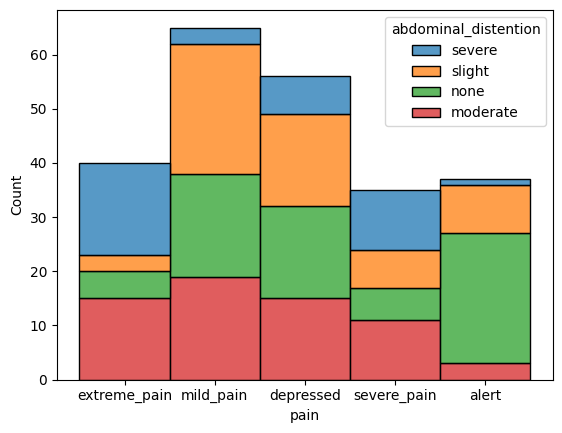

In [ ]:
sns.histplot(binwidth=0.5, x="pain", hue="abdominal_distention", data=df, stat="count", multiple="stack")

<Axes: xlabel='abdominal_distention', ylabel='Count'>

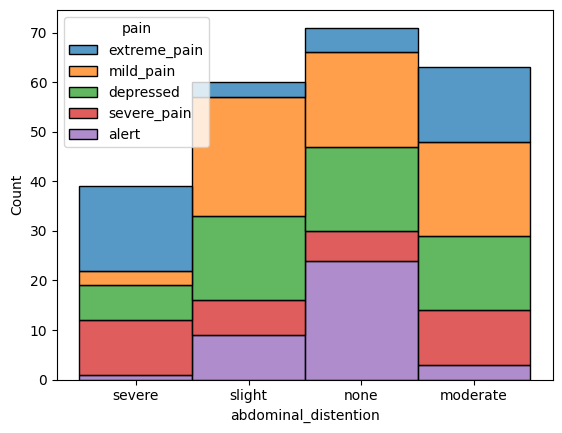

In [ ]:
sns.histplot(binwidth=0.5, x="abdominal_distention", hue="pain", data=df, stat="count", multiple="stack")

# We conclude the following observations:

**For pain column:**

- Among all the horses that are alert and experience no pain, horses with no abdominal distention are the largest group.
- Among all the horses experience depression, horses with moderate/none abdominal distention are the largest group.
- Among all the horses experience mild pain, horses with slight abdominal distention is the largest group.
- Among all the horses experience severe_pain, horses with severe/moderate_abdominal distention are the largest group.
- Among all the horses experience extreme_pain, horses with severe abdominal distention is the largest group.

**For abdominal_distention column:**

- Among all the horses that have no abdominal distention, horses that are alert are the largest group.
- Among all the horses that have slight abdominal distention, horses with mild pain are the largest group.
- Among all the horses that have moderate abdominal distention, horses with mild pain is the largest group.
-  Among all the horses that have severe abdominal distention, horses with extreme pain is the largest group.

From the observation above, we can conclude the mapping between pain and abdominal_distention is:

**For pain:**
- alert <-> none;
- depressed -> none
- mild_pain <-> slight
- severe_pain -> severe
- extreme_pain <-> severe

**For abdominal_distention:**
- moderate -> mild_pain


In [ ]:
map_pain_to_ad = {'alert': 'none', 'depressed': 'none', 'mild_pain': 'slight','severe_pain': 'severe', 'extreme_pain': 'severe'}
map_ad_to_pain = {'severe': 'extreme_pain', 'moderate': 'mild_pain',
                 'slight': 'mild_pain', 'none': 'alert',}
df['pain'] = df['pain'].fillna(df['abdominal_distention'].map(map_ad_to_pain))
df['abdominal_distention'] = df['abdominal_distention'].fillna(df['pain'].map(map_pain_to_ad))
df.head(100)
df.isna().sum()

surgery                                              0
age                                                  0
rectal_temp                                          0
pulse                                                0
respiratory_rate                                     0
temp_of_extremities                                 55
peripheral_pulse                                    66
mucous_membrane                                     23
capillary_refill_time                               23
pain                                                29
peristalsis                                         34
abdominal_distention                                29
packed_cell_volume                                   0
total_protein                                        0
surgical_lesion                                      0
site of lesion_all intestinal sites                  0
site of lesion_bladder                               0
site of lesion_cecum                                 0
site of le


 # Cleaning temp_of_extremities:#
 As stated in the data description, "hot extremities should correlate with an elevated rectal temp."
 - a normal rectal temperature is 37.8 degrees celsius (from the descrition)
 - a low rectal temperatuee is lower than 37.2
 - a high rectal temperature is higher than 38.3
 - source: https://www.merckvetmanual.com/multimedia/table/normal-rectal-temperature-ranges

We are going show the correlation between rectal temp and extremities.

Using bar graph for rect temp and temp_of_extremities

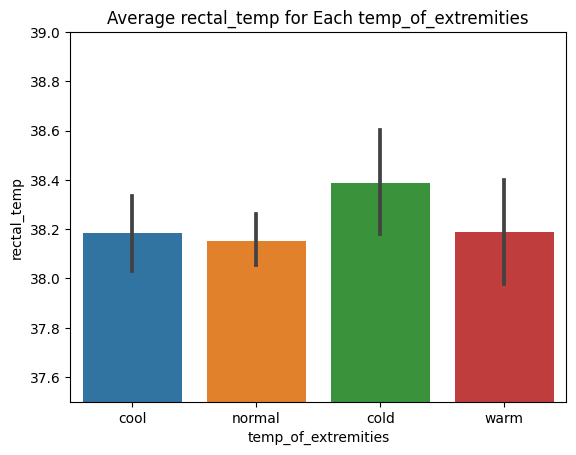

In [ ]:
# temp_df = df[['rectal_temp', 'temp_of_extremities_cold', 'temp_of_extremities_cool',
#              'temp_of_extremities_normal', 'temp_of_extremities_warm']].copy()

temp_df = df[['rectal_temp', 'temp_of_extremities']].copy()
temp_df = temp_df.dropna()
temp_df

sns.barplot(x='temp_of_extremities', y='rectal_temp', data=df)
plt.title('Average rectal_temp for Each temp_of_extremities')
plt.ylim(37.5, 39)
plt.show()

From the Diagram we can observe that when the horses have cool or normal temperatrue of extremities. The rectal temperature is under a normal range (37.8 - 38.2). When the horses have warm extremities, the average is slightly higher, but still under 38.3. However, when horses have cold extremities, the average is significantly higher. The underlying cause of the high temperature might be the horses are undergoing an infections, as stated in data description, "An elevated temp may occur due to infection".
The data description also states "cool to cold extremities indicate possible shock".

From the description, mucous membrane is another indicator of shock occurrance in horse, "Pale pink may occur in early shock."
We are going to explore the relationship between mucous membrane and temperatures of extremities:

<Axes: xlabel='temp_of_extremities', ylabel='Count'>

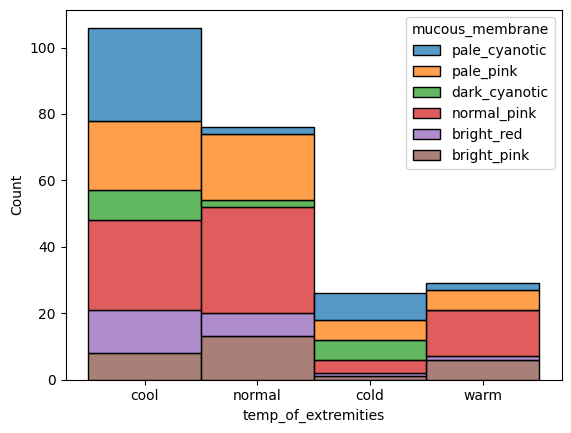

In [ ]:
sns.histplot(binwidth=0.5, x="temp_of_extremities", hue="mucous_membrane", data=df, stat="count", multiple="stack")

We notice for cool and cold temp_of_extremities, the majority of them is pale_cyanotic, pale_pink, and dark_cynaotic, based on the description, those colors indicate that the horses are undergoing circulatory compromise and shocks. If the circulatory system is not functioning normally, then the temp_of_extremities is likely to be cool or cold since horse metabolism is low.

We are going to imputate the data based on rectal temp and mucous membrane color:

In [ ]:
map_m_to_temp = {'pale_cyanotic': 'cool', 'dark_cyanotic': 'cold'}
map_temp_to_mem = {'normal': 'normal_pink', 'warm': 'normal_pink', 'cold': 'dark_cyanotic'}

# fill in the value of capillary_refill_time since we fill in some null value for mucous_membrane.
df['capillary_refill_time'] = df['capillary_refill_time'].fillna(df['mucous_membrane'].map(map_mm_to_crt))
df['temp_of_extremities'] = df['temp_of_extremities'].fillna(df['mucous_membrane'].map(map_m_to_temp))
df['temp_of_extremities'] = np.where(df['rectal_temp'] >= 38.4, 'cold', df['temp_of_extremities'])
df['temp_of_extremities'] = np.where((df['rectal_temp'] > 38.2) & (df['rectal_temp'] < 38.4), 'warm', df['temp_of_extremities'])
df['temp_of_extremities'] = np.where((df['rectal_temp'] > 38.0) & (df['rectal_temp'] <= 38.2), 'normal', df['temp_of_extremities'])
df['temp_of_extremities'] = np.where(df['rectal_temp'] <= 38.0, 'cold', df['temp_of_extremities'])


df.isna().sum()

surgery                                              0
age                                                  0
rectal_temp                                          0
pulse                                                0
respiratory_rate                                     0
temp_of_extremities                                  0
peripheral_pulse                                    66
mucous_membrane                                     23
capillary_refill_time                               23
pain                                                29
peristalsis                                         34
abdominal_distention                                29
packed_cell_volume                                   0
total_protein                                        0
surgical_lesion                                      0
site of lesion_all intestinal sites                  0
site of lesion_bladder                               0
site of lesion_cecum                                 0
site of le

###Cleaning peripheral_pulse: ###

The possible value for peripheral_pulse are:
1 = normal
2 = increased
3 = reduced
4 = absent
- normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion

<Axes: xlabel='peripheral_pulse', ylabel='Count'>

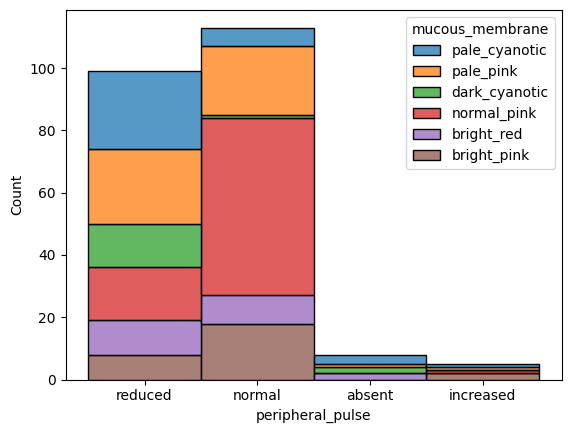

In [ ]:
sns.histplot(binwidth=0.5, x="peripheral_pulse", hue="mucous_membrane", data=df, stat="count", multiple="stack")

<Axes: xlabel='mucous_membrane', ylabel='Count'>

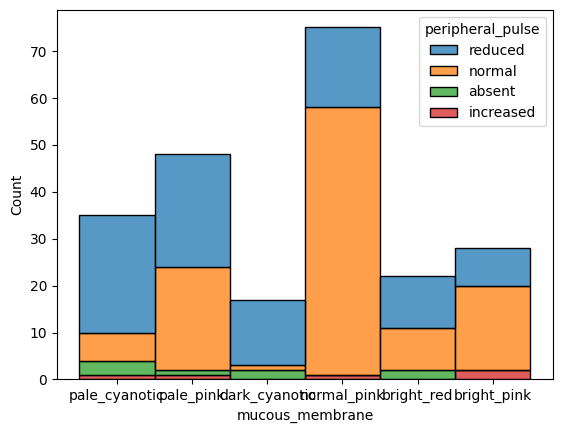

In [ ]:
sns.histplot(binwidth=0.3, x="mucous_membrane", hue="peripheral_pulse", data=df, stat="count", multiple="stack")

In [ ]:
map_m_to_pulse = {'normal_pink': 'normal', 'pale_cyanotic': 'reduced', 'bright_pink': 'normal', 'dark_cyanotic': 'reduced', 'bright_pink': 'normal'}
map_pulse_to_mem = {'normal': 'normal_pink', 'reduced' : 'pale_cyanotic'}
df['mucous_membrane'] = df['mucous_membrane'].fillna(df['peripheral_pulse'].map(map_pulse_to_mem))
df['capillary_refill_time'] = df['capillary_refill_time'].fillna(df['mucous_membrane'].map(map_mm_to_crt))
df['peripheral_pulse'] = df['peripheral_pulse'].fillna(df['mucous_membrane'].map(map_m_to_pulse))
df.isna().sum()
df.dropna()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,lesion specific code_displacement,lesion specific code_extrinsic,lesion specific code_hernia,lesion specific code_intrinsic,lesion specific code_intussuption,lesion specific code_lipoma/slenic incarceration,lesion specific code_obturation,lesion specific code_thromboembolic,lesion specific code_volvulus/torsion,outcome
0,no,adult,38.500000,66.0,28.0,cold,reduced,pale_cyanotic,more_3_sec,extreme_pain,...,0,0,0,0,0,0,0,0,0,died
1,yes,adult,39.200000,88.0,20.0,cold,reduced,pale_cyanotic,less_3_sec,mild_pain,...,0,0,1,0,0,0,0,0,0,euthanized
2,no,adult,38.300000,40.0,24.0,warm,normal,pale_pink,less_3_sec,mild_pain,...,0,0,0,0,0,0,0,0,0,lived
3,yes,young,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,0,0,1,0,0,0,0,0,0,died
5,no,adult,38.172961,64.0,24.5,normal,normal,pale_pink,less_3_sec,depressed,...,0,0,0,0,0,0,0,0,0,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,no,adult,38.500000,40.0,16.0,cold,normal,normal_pink,less_3_sec,depressed,...,0,0,0,0,0,0,0,0,0,lived
294,yes,adult,38.172961,120.0,70.0,normal,reduced,pale_cyanotic,more_3_sec,depressed,...,0,0,0,0,0,0,0,0,1,euthanized
295,no,adult,37.200000,72.0,24.0,cold,increased,pale_cyanotic,more_3_sec,severe_pain,...,0,0,1,0,0,0,0,0,0,euthanized
296,yes,adult,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,0,0,0,0,0,0,0,0,1,died


# One-hot encode all the categorical data


In [ ]:
# drop first for binary columns
df = pd.get_dummies(df, columns=['surgical_lesion', 'age', 'surgery'], drop_first=True)
# don't drop first for non-binary columns
df = pd.get_dummies(df, columns=['capillary_refill_time', 'abdominal_distention', 'peristalsis', 'pain', 'mucous_membrane',
                                 'peripheral_pulse', 'temp_of_extremities'])
# note: didn't encode label column
# drop the extra outcome column
cols = df.columns.tolist()
cols.remove('outcome')
cols.append('outcome')
df = df[cols]

#**Modeling**
We experiment with the following algorithms:
*   Clustering
  - Kmeans
  - DBSCAN
  - Hierarchical
*   Decision Tree
*   Random Forest
*   KNN
*   Neural Nets
*   Naive Bayes


#Clustering

We hypothesize that the data has a natural clustering of 3 clusters based on values in the outcome column. We will try Kmeans clustering, DBSCAN, and hierarchical clustering, and will perform different kinds of cluster validation.




**Clustering results**
kmeans:
k=3 silhouette score 0.07111244215208978
k=3 rand index 0.578119851245116
k=2 silhouette score 0.08635496623385838
k=2 rand index 0.6148849032622511 

DBSCAN:


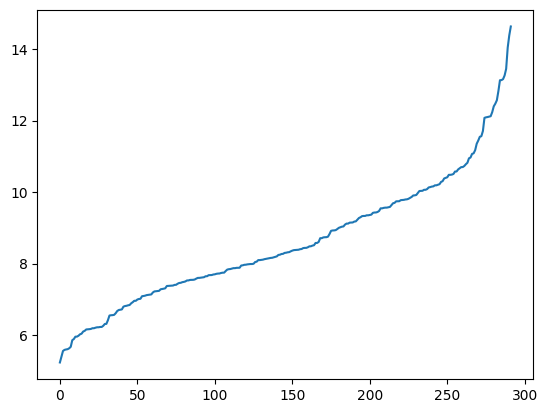

eps=7, minPts=4 rand index 0.5418726168620251
eps=8, minPts=10 rand index 0.5398248834910323
eps=8, minPts=20 rand index 0.5244315774608106 

Hierarchical:
single 0.8137758063617512
complete 0.7872671690945419
average 0.8429499903694415
centroid 0.8083915357211663
ward 0.35069970978033027


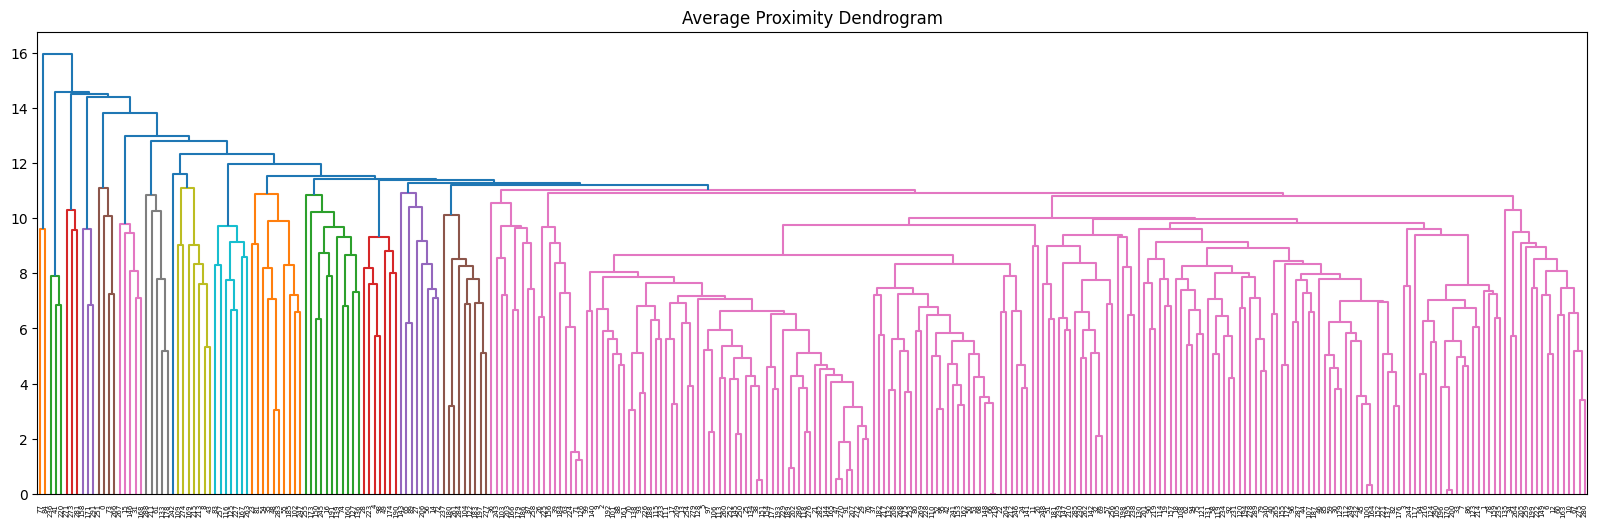

In [ ]:
print('**Clustering results**')
# Kmeans
print('kmeans:')
# separate the label column
labels = df['outcome']
raw_df = df.drop('outcome', axis = 1)
# scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(raw_df)
# add column names back
scaled_df = pd.DataFrame(scaled_df, columns = raw_df.columns)
# display(scaled_df)
# perform kmeans
# note: using k=2, 3 because those are the logical true clusters (lived, died, euthanized)
# or (lived, died/euthanized)
km = KMeans(n_clusters=3, n_init=10)
km_preds = km.fit_predict(scaled_df)
# calculate silhouette score
km_result = silhouette_score(X=scaled_df, labels=km_preds)
print('k=3 silhouette score', km_result)
# calculate rand index using true labels (supervised validation)
km_rand = metrics.rand_score(labels, km_preds)
print('k=3 rand index', km_rand)
# try with k=2
km = KMeans(n_clusters=2, n_init=10)
km_preds = km.fit_predict(scaled_df)
# calculate silhouette score (unsupervised validation)
km_result = silhouette_score(X=scaled_df, labels=km_preds)
print('k=2 silhouette score', km_result)
# calculate rand index using true labels (supervised validation)
km_rand = metrics.rand_score(labels, km_preds)
print('k=2 rand index', km_rand, '\n')

# DBSCAN
print('DBSCAN:')
# find optimal eps
NN = NearestNeighbors(n_neighbors=20) # tried 4, 10, 20 to get diff eps values
neighbors = NN.fit(scaled_df)
distances, indices = neighbors.kneighbors(scaled_df)
fourth_distances = [dist[19] for dist in distances]
fourth_distances.sort()
plt.plot(fourth_distances)
plt.show() # choose eps of 7
dbscan = DBSCAN(eps=7, min_samples=4)
dbscan_result = dbscan.fit(scaled_df)
dbscan_labels = pd.Series(dbscan_result.labels_)
# calculate rand index using true labels (supervised validation)
dbscan_rand = metrics.rand_score(labels, dbscan_labels)
print('eps=7, minPts=4 rand index', dbscan_rand)
# try eps=8, minPts=10
dbscan = DBSCAN(eps=8, min_samples=10)
dbscan_result = dbscan.fit(scaled_df)
dbscan_labels = pd.Series(dbscan_result.labels_)
# calculate rand index using true labels (supervised validation)
dbscan_rand = metrics.rand_score(labels, dbscan_labels)
print('eps=8, minPts=10 rand index', dbscan_rand)
# try eps=8, minPts=20
dbscan = DBSCAN(eps=8, min_samples=20)
dbscan_result = dbscan.fit(scaled_df)
dbscan_labels = pd.Series(dbscan_result.labels_)
# calculate rand index using true labels (supervised validation)
dbscan_rand = metrics.rand_score(labels, dbscan_labels)
print('eps=8, minPts=20 rand index', dbscan_rand, '\n')

# Hierarchical
print('Hierarchical:')
proximity_matrix = pdist(scaled_df)
# trying different proximity methods
# single
single_matrix = linkage(scaled_df, 'single')
single_cpcc, cm = cophenet(single_matrix, proximity_matrix)
print('single', single_cpcc)
# complete
complete_matrix = linkage(scaled_df, 'complete')
complete_cpcc, cm = cophenet(complete_matrix, proximity_matrix)
print('complete', complete_cpcc)
# average
average_matrix = linkage(scaled_df, 'average')
average_cpcc, cm = cophenet(average_matrix, proximity_matrix)
print('average', average_cpcc)
# centroid
centroid_matrix = linkage(scaled_df, 'centroid')
centroid_cpcc, cm = cophenet(centroid_matrix, proximity_matrix)
print('centroid', centroid_cpcc)
# ward
ward_matrix = linkage(scaled_df, 'ward')
ward_cpcc, cm = cophenet(ward_matrix, proximity_matrix)
print('ward', ward_cpcc)
# create dendrogram for the best performing proximity metric (average)
plt.figure(figsize=(20, 6))
dendrogram(average_matrix)

plt.title('Average Proximity Dendrogram')
plt.show()

**We compare the label with the number of clusters and hierarchies in Hierarchical Clustering.**  

<Axes: >

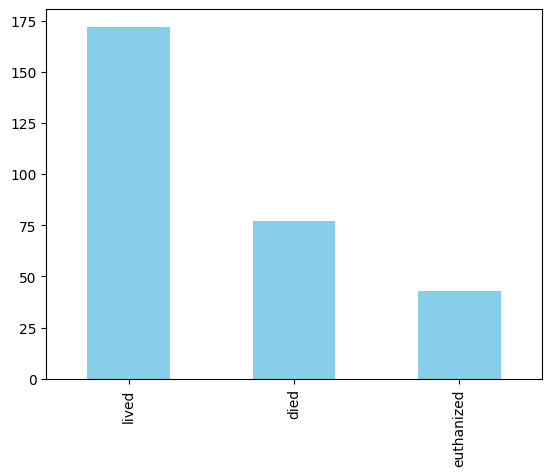

In [ ]:
df['outcome'].value_counts().plot(kind='bar', color='skyblue')

# Clustering Conclusion
Using the logical number of clusters for k (explained above), kmeans does a relatively poor job at clustering the data. The rand indexes indicate that the performance is only slightly better than random guessing, and the silhouette coefficients indicate that the average distances to objects within the same cluster are only slightly less than distances to other objects.

We then tried density-based clustering and found the results to also be less than satisfactory. For multiple different values of eps and minPts, the accuracy is below 50%

Finally, we tried hierarchical clustering. The cophenetic correlation coefficients indicate a strong correlation for several of the different methods, with average-based proximity performing the best. We can justify this result by considering how the the 'euthanized' outcome could be evaluated as a sub-category of the 'died' outcome. This idea could explain why the other two clustering methods did not perform as well.

# Decision Tree
We will now create a decision tree classifier with our data to see how it performs

In [ ]:
final_accuracy = {}

# will not scale, as decision trees do not require feature scaling
print('**Decision tree results**')
classifier = DecisionTreeClassifier(random_state=0, splitter = "best")

# hyperparameter tuning to avoid overfitting
params = {"max_depth": [5,10,15,20], "max_features":[5,10,15], "min_samples_leaf":[5,10,15,20],
          "min_impurity_decrease":[0.1,0.05,0.01,0]}
grid_search = GridSearchCV(classifier, params, cv=5, scoring='accuracy')

# evaluate final model accuracy through nested cv
y_pred = cross_val_predict(grid_search, raw_df, labels, cv=5)
cmatrix = confusion_matrix(labels, y_pred)
accuracy = accuracy_score(labels, y_pred)
print("final accuracy:", accuracy, '\n')
print("confusion matrix:")
print(cmatrix, '\n')
print("classification report:")
print(classification_report(labels, y_pred), '\n')

final_accuracy['decision_tree'] = accuracy

**Decision tree results**
final accuracy: 0.5993150684931506 

confusion matrix:
[[ 34   6  37]
 [ 18   9  16]
 [ 31   9 132]] 

classification report:
              precision    recall  f1-score   support

        died       0.41      0.44      0.42        77
  euthanized       0.38      0.21      0.27        43
       lived       0.71      0.77      0.74       172

    accuracy                           0.60       292
   macro avg       0.50      0.47      0.48       292
weighted avg       0.58      0.60      0.59       292
 



# Random Forest Model
We will now see how the accuracy of a random forest classifier compares

In [ ]:
print('**Random Forest results**')
classifier = RandomForestClassifier(random_state=0)

# tune hyperparams for proper pruning / avoiding overfitting
params = {"max_depth": [2,5,10,15,20], "max_features":[5,10,15], "min_samples_leaf":[5,10,15,20],
          "n_estimators":[10,50,100,200]}
grid_search = GridSearchCV(classifier, params, cv=5, scoring='accuracy')

# evaluate final model accuracy through nested cv
y_pred = cross_val_predict(grid_search, raw_df, labels, cv=5)
accuracy = accuracy_score(labels, y_pred)
print("final accuracy:", accuracy, '\n')

print("confusion matrix:")
print(confusion_matrix(labels, y_pred), '\n')

print("classification report:")
print(classification_report(labels, y_pred), '\n')

final_accuracy['random_forest'] = accuracy

**Random Forest results**
final accuracy: 0.684931506849315 

confusion matrix:
[[ 39   1  37]
 [ 12   5  26]
 [ 13   3 156]] 

classification report:
              precision    recall  f1-score   support

        died       0.61      0.51      0.55        77
  euthanized       0.56      0.12      0.19        43
       lived       0.71      0.91      0.80       172

    accuracy                           0.68       292
   macro avg       0.63      0.51      0.51       292
weighted avg       0.66      0.68      0.64       292
 



# Decision Tree + Random Forest Conclusion
After tuning parameters with nested CV for both methods, the random forest classifier has better results, with a final accuracy of 0.68 as compared to the 0.59 accuracy of the decision tree classifier. Random forest's use of bagging data typically helps avoid overfitting to noise; though it did not lead to extremely significant improvements in accuracy and lowered the recall of the euthanized horses, the random forest classifier resulted in an improvement of average accuracy and all precisions with our data. The lower recall/f1-score of the euthanized class may be due to having a relatively smaller number of datapoints in the euthanized class to represent in the various test/train groups.

# K-Nearest Neighhbors
The following is result of using a K-nearest neighbors classification algorithm on the data. Due to the large number of features, we will conduct a PCA decomposition in our cross validation loop alongside our standardization.

In [ ]:
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsClassifier(n_neighbors=7)
pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn', knn)])
scores = cross_val_score(pipeline, raw_df, labels, cv=5)

print("Accuracy:", scores.mean()*100)

final_accuracy['knn'] = scores.mean()*100

Accuracy: 67.8082992402104


**For the classifiers below in `scikit-learn` require to separate the feature columns from the class label**

In [ ]:
features = df.iloc[:, 0:38]

# Neural Network
We will now create a Neural Network classifier with our data to see how it performs. Since Neural network requires numerical values for the label, we create the following mapping:
- 1.0 <-> lived
- 2.0 <-> died
- 3.0 <-euthanized

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def run_nn():
    print('**Neural Network results**')
    # encode the string label to float 1.0 <-> lived, 2.0 <->died
    # 3.0 <-euthanized
    nn_label = []
    for class_label in labels:
      if class_label == 'lived':
        nn_label.append(1.0)
      elif class_label == 'died':
        nn_label.append(2.0)
      elif class_label == 'euthanized':
        nn_label.append(3.0)
    nn_clf = MLPClassifier()
    # define the pipeline steps
    pipeline_nn = Pipeline([('scaler', scaler), ('nn_clf', nn_clf)])
    # define the hyperparameters
    param_grid_nn = {
        'nn_clf__hidden_layer_sizes':  [30, 40, 50, 60],
        'nn_clf__activation': ['identity','logistic', 'tanh', 'relu']
    }
    nn_grid_search = GridSearchCV(pipeline_nn, param_grid_nn, cv=5, scoring='accuracy')
    nn_scores = cross_val_score(nn_grid_search, features, nn_label, cv=5)
    print('Neural Net Accuracy:', nn_scores.mean()*100)

    return nn_scores.mean() * 100
final_accuracy['neural_network'] = run_nn()

**Neural Network results**
Neural Net Accuracy: 70.55523085914669


**Conclusion for Neural Networks**

- The accuracy is consistent with other classification results.
- One way we can improve the model is if we have more training data we will get more optimal solution instead of local minima. In addition, More training data will prevent overfitting.


#Naive Bayes#
We will now create a Naive Bayes classifier with our data to see how it performs.

In [ ]:
# your code goes here
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_nested_score = cross_val_score(nb_clf, features, labels, cv=5)
# average the accuracies
print("Accuracy:", nb_nested_score.mean()*100)

final_accuracy['naive_bayes'] = nb_nested_score.mean() * 100

Accuracy: 37.317358270017536


**Conclusion for Naive Bayes**

- Naive Bayes classifier preforms poorly compare to other classifier. It's almost half of the accuracy of other classifcaition technique such as neural network or random forest.

- One important assumption Naive classfier makes is that all column is independent from each other. From the data cleaning part we know there is high correlation between mucous membrane and capillary refill time. There are a couple other variables depends on each other. In addition, there are some continuous features such as rectal temperature and Naive Bayes don't handle continuous feature well.


# Classification Results
From the classification algorithms tests, all of our models did moderately well with similar accuracies, except for naive bayes. However, naive bayes was expected to do poorly since our features are very far from independent of each other (many of them are directly related by their definition). In this instance the neural network resulted in the highest accuracy, so we would use it to implement our diagnostic assistant.

If we were to continue this project, we would start by returning back to feature engineering. The original dataset of 300 records is difficult to work with when it's describing 28 features, and even more so after one-hot encoding. With more time we'd evaluate further which features are necessary to maintain variance in the feature space. An alternative approach is to focus on predicting more specific diagnostics than 'outcome'. If we were to narrow down on predicting specific conditions, then we would be able to only work with features that are symptoms and metrics related to that condition.

In [ ]:
for key, value in final_accuracy.items():
    print(key, value)

decision_tree 0.5993150684931506
random_forest 0.684931506849315
knn 67.8082992402104
neural_network 70.55523085914669
naive_bayes 37.317358270017536
